In [60]:
from pycocotools import mask as mk
import json
from skimage.measure import *
import numpy as np
import matplotlib.pyplot as plt
from utils import compute_dimension
import cv2
from PIL import Image
import plotly.graph_objects as go
import pyvista as pv

In [61]:
file = open("runs/detect/exp14/instances/inference/coco_instances_results.json")
positions_file = open("runs/detect/exp14/instances/positions.json")

_names = json.load(open("runs/detect/exp14/instances/labels.json"))
json_data = json.load(file)
positions = json.load(positions_file)


file.close()
positions_file.close()

In [62]:
area = np.load("dati1.txt.npy")
print(area.shape)

(211, 3)


In [63]:
from matplotlib import cm
area_b = np.ones((area.shape[0], 3))
min_x = np.min(area[:,0])
max_x = np.max(area[:,0])
min_y = np.min(area[:,1])
max_y = np.max(area[:,1])
min_z = np.min(area[:,2])
max_z = np.max(area[:,2])
_a = np.abs(max_x-min_x) * np.abs(max_y-min_y) 
print(f"The square area of the leaf is: {_a}")
print(f"The height of the leaf is: {max_z-min_z}")
x = area[:,0]
y = area[:,1]
z = area[:,2]


fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z)])
fig.show()

cloud = pv.PolyData(area)
surf = cloud.delaunay_2d()
print(surf.area)


The square area of the leaf is: 0.00024733586576138506
The height of the leaf is: 0.004125000000000045


0.0002196448916263639


In [64]:
def det(a):
    return a[0][0]*a[1][1]*a[2][2] + a[0][1]*a[1][2]*a[2][0] + a[0][2]*a[1][0]*a[2][1] - a[0][2]*a[1][1]*a[2][0] - a[0][1]*a[1][0]*a[2][2] - a[0][0]*a[1][2]*a[2][1]

#unit normal vector of plane defined by points a, b, and c
def unit_normal(a, b, c):
    x = det([[1,a[1],a[2]],
             [1,b[1],b[2]],
             [1,c[1],c[2]]])
    y = det([[a[0],1,a[2]],
             [b[0],1,b[2]],
             [c[0],1,c[2]]])
    z = det([[a[0],a[1],1],
             [b[0],b[1],1],
             [c[0],c[1],1]])
    magnitude = (x**2 + y**2 + z**2)**.5
    return (x/magnitude, y/magnitude, z/magnitude)

#dot product of vectors a and b
def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

#cross product of vectors a and b
def cross(a, b):
    x = a[1] * b[2] - a[2] * b[1]
    y = a[2] * b[0] - a[0] * b[2]
    z = a[0] * b[1] - a[1] * b[0]
    return (x, y, z)

#area of polygon poly
def testa(poly):
    if len(poly) < 3: # not a plane - no area
        return 0

    total = [0, 0, 0]
    for i in range(len(poly) - 1):
        vi1 = poly[i]
        if i is len(poly)-1:
            vi2 = poly[0]
        else:
            vi2 = poly[i+1]
        prod = cross(vi1, vi2)
        total[0] += prod[0]
        total[1] += prod[1]
        total[2] += prod[2]
    result = dot(total, unit_normal(poly[0], poly[1], poly[2]))
    return abs(result/2)

In [65]:
print(testa(area))
print(area)

0.0033430140513884153
[[-0.1424821   0.26480706  0.526625  ]
 [-0.13475197  0.26556132  0.528125  ]
 [-0.13376663  0.26562417  0.52825   ]
 [-0.1327808   0.26568703  0.528375  ]
 [-0.13176332  0.26568703  0.528375  ]
 [-0.13074585  0.26568703  0.528375  ]
 [-0.12969768  0.26562417  0.52825   ]
 [-0.14251592  0.26590054  0.52675   ]
 [-0.14160231  0.26608984  0.527125  ]
 [-0.14065392  0.26621604  0.527375  ]
 [-0.13973766  0.26640533  0.52775   ]
 [-0.13872138  0.26640533  0.52775   ]
 [-0.13777034  0.26653153  0.528     ]
 [-0.13678596  0.26659463  0.528125  ]
 [-0.1358011   0.26665773  0.52825   ]
 [-0.13478386  0.26665773  0.52825   ]
 [-0.13376663  0.26665773  0.52825   ]
 [-0.1327808   0.26672083  0.528375  ]
 [-0.13176332  0.26672083  0.528375  ]
 [-0.13074585  0.26672083  0.528375  ]
 [-0.12969768  0.26665773  0.52825   ]
 [-0.12868044  0.26665773  0.52825   ]
 [-0.14254974  0.26699451  0.526875  ]
 [-0.14163589  0.26718454  0.52725   ]
 [-0.14072059  0.26737457  0.527625  ]
 [-

In [66]:
poly = np.array([[0, 0, 0], [10, 0, 0], [10, 3, 4], [0, 3, 4], [5,2,5]])
fig = go.Figure(data=[go.Mesh3d(x=poly[:,0], y=poly[:,1], z=poly[:,2])])
fig.show()

print(testa(poly))

37.5


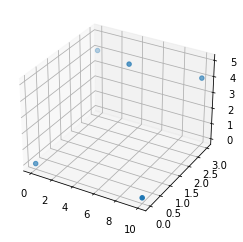

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(poly[:,0],poly[:,1],poly[:,2])
plt.show()